In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import json
import seaborn as sns

import math
import re
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import pytz
# from datetime import datetime
import datetime
import time

import collections
from wordcloud import WordCloud

In [2]:
import settings
import mysql.connector
import itertools
import os 
import psycopg2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import plotly
import random
import plotly.express as px
from IPython.display import clear_output
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
py.init_notebook_mode()

In [3]:
# Filter constants for states in US
STATES = ['Alabama', 'AL', 'Alaska', 'AK', 'American Samoa', 'AS', 'Arizona', 'AZ', 'Arkansas', 'AR', 'California', 'CA', 'Colorado', 'CO', 'Connecticut', 'CT', 'Delaware', 'DE', 'District of Columbia', 'DC', 'Federated States of Micronesia', 'FM', 'Florida', 'FL', 'Georgia', 'GA', 'Guam', 'GU', 'Hawaii', 'HI', 'Idaho', 'ID', 'Illinois', 'IL', 'Indiana', 'IN', 'Iowa', 'IA', 'Kansas', 'KS', 'Kentucky', 'KY', 'Louisiana', 'LA', 'Maine', 'ME', 'Marshall Islands', 'MH', 'Maryland', 'MD', 'Massachusetts', 'MA', 'Michigan', 'MI', 'Minnesota', 'MN', 'Mississippi', 'MS', 'Missouri', 'MO', 'Montana', 'MT', 'Nebraska', 'NE', 'Nevada', 'NV', 'New Hampshire', 'NH', 'New Jersey', 'NJ', 'New Mexico', 'NM', 'New York', 'NY', 'North Carolina', 'NC', 'North Dakota', 'ND', 'Northern Mariana Islands', 'MP', 'Ohio', 'OH', 'Oklahoma', 'OK', 'Oregon', 'OR', 'Palau', 'PW', 'Pennsylvania', 'PA', 'Puerto Rico', 'PR', 'Rhode Island', 'RI', 'South Carolina', 'SC', 'South Dakota', 'SD', 'Tennessee', 'TN', 'Texas', 'TX', 'Utah', 'UT', 'Vermont', 'VT', 'Virgin Islands', 'VI', 'Virginia', 'VA', 'Washington', 'WA', 'West Virginia', 'WV', 'Wisconsin', 'WI', 'Wyoming', 'WY']
STATE_DICT = dict(itertools.zip_longest(*[iter(STATES)] * 2, fillvalue=""))
INV_STATE_DICT = dict((v,k) for k,v in STATE_DICT.items())

In [4]:
# Load json data containing tweets
# tweets_data_path = 'elite.json'

# with open(tweets_data_path) as f:
#   tweets_data = json.load(f)
# print("The total number of Tweets is:",len(tweets_data))
# import pprint
# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(tweets_data[0])
# # Convert json to dataframe
# tweets_df = pd.read_json(tweets_data_path, orient='columns')

In [5]:
# Load data from MySQL
# conn = mysql.connector.connect(
#     host="localhost",
#     user="root",
#     passwd="password",
#     database="db",
#     charset = 'utf8'
# )
# TABLE_NAME = "elite"

# Load data from Postgresql
# DATABASE_URL = os.environ['DATABASE_URL'] #or "elite.db"
TABLE_NAME = "dynamite"
# conn = connect(DATABASE_URL)
# conn = psycopg2.connect(DATABASE_URL, sslmode='require')

conn = psycopg2.connect(user = "root",
                        password = "",
                        host = "localhost",
                        port = "5432",
                        database = "dbtwitter")


# timenow = (datetime.datetime.utcnow() - datetime.timedelta(hours=0, minutes=30)).strftime('%Y-%m-%d %H:%M:%S')
# query = "SELECT * FROM {} WHERE created_at >= '{}' ".format(TABLE_NAME, timenow)
query = "SELECT * FROM {} ".format(TABLE_NAME)
tweets_df = pd.read_sql(query, con=conn)

In [6]:
tweets_df

created_at               id_str  \
0   2020-03-18 20:44:31  1240378573434818568   
1   2020-03-18 20:44:32  1240378577708818439   
2   2020-03-18 20:44:33  1240378579571167237   
3   2020-03-18 20:44:42  1240378620130004993   
4   2020-03-18 20:44:46  1240378636370202625   
..                  ...                  ...   
138 2020-03-18 20:59:14  1240382278049636360   
139 2020-03-18 20:59:22  1240382308739436544   
140 2020-03-18 20:59:23  1240382312879132673   
141 2020-03-18 20:59:24  1240382318021349377   
142 2020-03-18 20:59:27  1240382329157083136   

                                                  text in_reply_to  \
0    RT @SwoleWorld: Tonight on #AEWDynamite  it's ...        None   
1    RT @AEWrestling: .@trentylocks tells it like i...        None   
2    RT @365Wrestle: CM Punk on potential opponents...        None   
3    RT @AEWrestling: "The name says it all. It's b...        None   
4    RT @AEWrestling: Caption this.\n\nWatch #AEWDy...        None   
..                                                 ...         ...   
138  This just makes me so happy. I just watched Br...        None   
139  Who is the exalted one? #AEWDynamite #aew #Joi...        None   
140  RT @TheBrandiRhodes: If I gotta do it, I’m gon...        None   
141  RT @thewadekeller: The parking lot for the sit...        None   
142  RT @SonyaDevilleWWE: Fun interview talking abo...        None   

          was_retweet_id was_retweet_user        user_name  \
0    1240378183456821250       SwoleWorld    SeekingAsylum   
1    1240322467928956928      AEWrestling           cvzcjx   
2    1240109279467597824       365Wrestle         pttwhite   
3    1239930742169190402      AEWrestling     ThomasMarrey   
4    1240375153244192773      AEWrestling       LanateHall   
..                   ...              ...              ...   
138                 None             None        BCis4Life   
139                 None             None  Alexand50011886   
140  1240379286370082818  TheBrandiRhodes     Troypatton20   
141  1240369806450270208    thewadekeller  LCDREmmyDockery   
142  1240381236402704386  SonyaDevilleWWE  hundals60751871   

           user_location                                   user_description  \
0        New Jersey, USA  I do art and stuff. Yeah.  \n\nWrestling is aw...   
1                Neptune                                               None   
2                   None       Huge wrestling fan\n\n#ChiefsKingdom\n\n#AEW   
3                   None  Grand jeune homme de 1m88, fan de Marvel comic...   
4             LONG BEACH     I Love WWE/ Impact Wrestling and Like to tweet   
..                   ...                                                ...   
138  North Carolina, USA  31 | Bi 🏳️‍🌈 | ☠️🤘🏻4-Life | I use twitter to m...   
139                 None                                               None   
140                 None                                               None   
141                 None                                               None   
142                 None  @wwe my favorite all times and my favorite wwe...   

            user_created   geo coordinates  user_followers_count  \
0    2015-07-30 04:04:14  None        None                    48   
1    2012-03-10 22:05:54  None        None                  3725   
2    2013-04-10 01:56:40  None        None                   115   
3    2019-09-23 19:04:22  None        None                     4   
4    2010-04-28 02:41:21  None        None                   254   
..                   ...   ...         ...                   ...   
138  2009-06-28 19:52:41  None        None                  1593   
139  2020-03-05 02:05:23  None        None                     0   
140  2017-09-04 15:20:53  None        None                   169   
141  2013-01-08 13:08:20  None        None                   292   
142  2020-02-21 20:52:50  None        None                    21   

     user_friends_count  retweet_count  favorites_count  polarity  \
0              

In [7]:
#tweets_df.head()
tweets_df['in_reply_to'] = tweets_df['in_reply_to'].apply(lambda i : i or '')

In [8]:
tweets_df['text'] = tweets_df['text'].apply(lambda text: text.encode('ascii', 'ignore').decode('ascii'))

In [9]:
# add column is_retweet 
tweets_df['is_retweet'] = tweets_df['text'].apply(lambda x: False if 'RT' not in x else True)
tweets_df.tail()

created_at               id_str  \
138 2020-03-18 20:59:14  1240382278049636360   
139 2020-03-18 20:59:22  1240382308739436544   
140 2020-03-18 20:59:23  1240382312879132673   
141 2020-03-18 20:59:24  1240382318021349377   
142 2020-03-18 20:59:27  1240382329157083136   

                                                  text in_reply_to  \
138  This just makes me so happy. I just watched Br...               
139  Who is the exalted one? #AEWDynamite #aew #Joi...               
140  RT @TheBrandiRhodes: If I gotta do it, Im gonn...               
141  RT @thewadekeller: The parking lot for the sit...               
142  RT @SonyaDevilleWWE: Fun interview talking abo...               

          was_retweet_id was_retweet_user        user_name  \
138                 None             None        BCis4Life   
139                 None             None  Alexand50011886   
140  1240379286370082818  TheBrandiRhodes     Troypatton20   
141  1240369806450270208    thewadekeller  LCDREmmyDockery   
142  1240381236402704386  SonyaDevilleWWE  hundals60751871   

           user_location                                   user_description  \
138  North Carolina, USA  31 | Bi 🏳️‍🌈 | ☠️🤘🏻4-Life | I use twitter to m...   
139                 None                                               None   
140                 None                                               None   
141                 None                                               None   
142                 None  @wwe my favorite all times and my favorite wwe...   

            user_created   geo coordinates  user_followers_count  \
138  2009-06-28 19:52:41  None        None                  1593   
139  2020-03-05 02:05:23  None        None                     0   
140  2017-09-04 15:20:53  None        None                   169   
141  2013-01-08 13:08:20  None        None                   292   
142  2020-02-21 20:52:50  None        None                    21   

     user_friends_count  retweet_count  favorites_count  polarity  \
138                 911              0                0         1   
139                   0              0                0         0   
140                 362              0                0         0   
141                 475              0                0         0   
142                 315              0                0         0   

     subjectivity  is_retweet  
138             1       False  
139             0       False  
140             0        True  
141             0        True  
142             0        True

In [10]:
tweets_df['was_retweet_user'] = tweets_df['was_retweet_user'].apply(lambda i : i or '')
tweets_df['was_retweet_id'] = tweets_df['was_retweet_id'].apply(lambda i : i or '')

In [11]:
# convert created_at and user_created time to CST
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format = '%Y-%m-%d %H:%M:%S', utc=True)
# tweets_df['created_at'] = tweets_df['created_at'].dt.tz_localize('utc')
tweets_df['created_at'] = tweets_df['created_at'].dt.tz_convert('US/Central')
tweets_df['user_created'] = pd.to_datetime(tweets_df['user_created'], format = '%Y-%m-%d %H:%M:%S', utc=True)
# tweets_df['user_created'] = tweets_df['user_created'].dt.tz_localize('utc')
tweets_df['user_created'] = tweets_df['user_created'].dt.tz_convert('US/Central')
tweets_df.tail()

created_at               id_str  \
138 2020-03-18 15:59:14-05:00  1240382278049636360   
139 2020-03-18 15:59:22-05:00  1240382308739436544   
140 2020-03-18 15:59:23-05:00  1240382312879132673   
141 2020-03-18 15:59:24-05:00  1240382318021349377   
142 2020-03-18 15:59:27-05:00  1240382329157083136   

                                                  text in_reply_to  \
138  This just makes me so happy. I just watched Br...               
139  Who is the exalted one? #AEWDynamite #aew #Joi...               
140  RT @TheBrandiRhodes: If I gotta do it, Im gonn...               
141  RT @thewadekeller: The parking lot for the sit...               
142  RT @SonyaDevilleWWE: Fun interview talking abo...               

          was_retweet_id was_retweet_user        user_name  \
138                                              BCis4Life   
139                                        Alexand50011886   
140  1240379286370082818  TheBrandiRhodes     Troypatton20   
141  1240369806450270208    thewadekeller  LCDREmmyDockery   
142  1240381236402704386  SonyaDevilleWWE  hundals60751871   

           user_location                                   user_description  \
138  North Carolina, USA  31 | Bi 🏳️‍🌈 | ☠️🤘🏻4-Life | I use twitter to m...   
139                 None                                               None   
140                 None                                               None   
141                 None                                               None   
142                 None  @wwe my favorite all times and my favorite wwe...   

                 user_created   geo coordinates  user_followers_count  \
138 2009-06-28 14:52:41-05:00  None        None                  1593   
139 2020-03-04 20:05:23-06:00  None        None                     0   
140 2017-09-04 10:20:53-05:00  None        None                   169   
141 2013-01-08 07:08:20-06:00  None        None                   292   
142 2020-02-21 14:52:50-06:00  None        None                    21   

     user_friends_count  retweet_count  favorites_count  polarity  \
138                 911              0                0         1   
139                   0              0                0         0   
140                 362              0                0         0   
141                 475              0                0         0   
142                 315              0                0         0   

     subjectivity  is_retweet  
138             1       False  
139             0       False  
140             0        True  
141             0        True  
142             0        True

In [12]:
tweets_df['sentiment'] = tweets_df['polarity'].apply(lambda x: -1 if x < 0 else ( 1 if x > 0 else 0) )

In [13]:
# Number of retweets
len(tweets_df[tweets_df['was_retweet_user']!=''])

106

In [14]:
# Compute # of RT's, @'s, and text tweets
retweet_tweets = tweets_df[tweets_df['is_retweet'] == True]
response_tweets = tweets_df[tweets_df['in_reply_to']!='']
mention_tweets = tweets_df[~tweets_df['text'].str.contains("RT")  & tweets_df['text'].str.contains("@")]
mention_tweets = mention_tweets[mention_tweets['in_reply_to']==""]
text_tweets = tweets_df[~tweets_df['text'].str.contains("@")  & ~tweets_df['text'].str.contains("RT")]
url_tweets = tweets_df[tweets_df['text'].str.contains("http")]

print("Total number of tweets:", len(tweets_df))
print("Total number of retweets:", len(retweet_tweets))
print("Total number of response tweets:", len(response_tweets))
print("Total number of tweets with mentions that are not retweets or responses:", len(mention_tweets))
print("Total number of text tweets:", len(text_tweets))
print("Number of tweets containing URL links:", len(url_tweets))
print("Number of different users:", tweets_df['user_name'].nunique())
print("Number of tweets per user:", len(tweets_df)/tweets_df['user_name'].nunique())

Total number of tweets: 143
Total number of retweets: 106
Total number of response tweets: 5
Total number of tweets with mentions that are not retweets or responses: 4
Total number of text tweets: 28
Number of tweets containing URL links: 82
Number of different users: 130
Number of tweets per user: 1.1


In [15]:
values = [ len(retweet_tweets), len(response_tweets), len(mention_tweets), len(text_tweets)]
labels = ['Retweets', 'Responses', 'Mentions', 'Text tweets']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_text = 'Percentage of Tweets by Type'
)
fig.show()

In [16]:
# Most retweeted accounts
retweeted_accounts = tweets_df[tweets_df['was_retweet_user']!='']
retweeted_accounts = retweeted_accounts['was_retweet_user']
retweeted_accounts
fdist = FreqDist(retweeted_accounts)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Word","Frequency"])
trace = go.Bar(x=fd["Word"], y=fd["Frequency"], name="Freq Dist")
# data = [trace]
# py.iplot(data)
fig = go.Figure(trace)
fig.update_layout(
    title="Most Retweeted Accounts",
    xaxis_title="Username",
    yaxis_title="Frequency",
)
fig.show()

In [17]:
# Most retweeted tweets
retweeted_tweets = tweets_df[tweets_df['was_retweet_id']!='']
retweeted_tweets = retweeted_tweets['was_retweet_id']
retweeted_tweets
fdist = FreqDist(retweeted_tweets)
fd = pd.DataFrame(fdist.most_common(20), columns = ["Tweet id","Frequency"])
fd

Tweet id  Frequency
0   1240379286370082818         24
1   1240369806450270208          7
2   1240381236402704386          7
3   1240376802914308096          6
4   1240375153244192773          4
5   1240354528454676481          4
6   1240374052918878209          3
7   1240381911526236160          3
8   1240109279467597824          2
9   1240369681594187779          2
10  1240351663518560263          2
11  1240295054100627458          2
12  1240260385271418882          2
13  1240060771238805510          2
14  1240381964793888768          2
15  1240378183456821250          1
16  1240322467928956928          1
17  1239930742169190402          1
18  1240367370440290305          1
19  1240063074394136580          1

In [18]:
# Find most used hashtags
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets_df['text'].apply(hashtag_pattern.findall))
hashtag_words = []
for match in hashtag_matches:
    for word in match:
        hashtag_words.append(word.lower())

In [19]:
# hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
# hashtag_ordered_list = hashtag_ordered_list[::-1]
# hashtag_ordered_values = []
# hashtag_ordered_keys = []
# for item in hashtag_ordered_list[0:50]:
#     hashtag_ordered_keys.append(item[0])
#     hashtag_ordered_values.append(item[1])

In [20]:
# fig, ax = plt.subplots(figsize = (12,12))
# y_pos = np.arange(len(hashtag_ordered_keys))
# ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
# ax.set_yticks(y_pos)
# ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
# ax.set_xlabel("Nº of appereances")
# ax.set_title("Most used #hashtags", fontsize = 20)
# plt.tight_layout(pad=3)
# plt.show()
fdist = FreqDist(hashtag_words)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Word","Frequency"]).reindex()
trace = go.Bar(x=fd["Word"], y=fd["Frequency"], name="Freq Dist")
# data = [trace]
# py.iplot(data)
fig = go.Figure(trace)
fig.update_layout(
    title="Most Frequently Used Hashtags",
    xaxis_title="Hashtags",
    yaxis_title="Frequency",
)
fig.show()

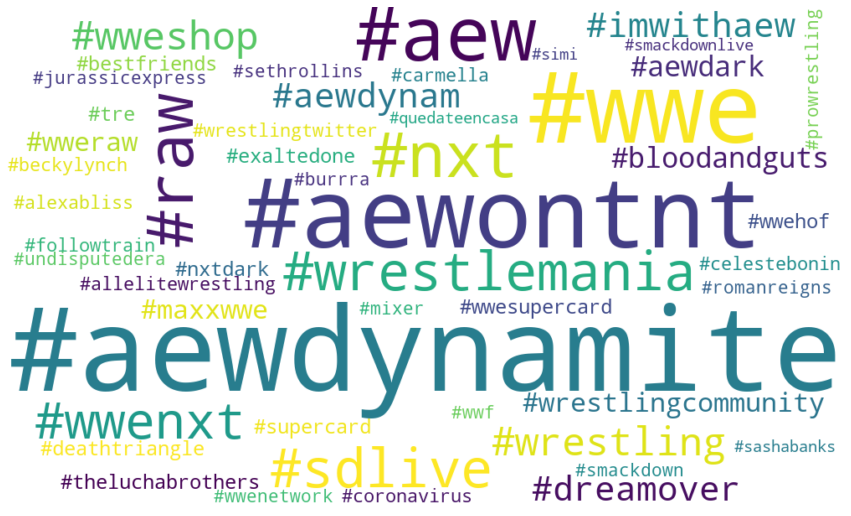

In [21]:
#Make a wordcloud plot of the most used hashtags
tuples = [tuple(x) for x in fd.values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# Find most mentioned accounts 
# mentions_df = tweets_df[tweets_df['was_retweet_id']==''] #tweets that are not retweets
# mentions_df = mentions_df[mentions_df['in_reply_to']==''] #tweets that are not responses
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(tweets_df['text'].apply(mention_pattern.findall))
mentioned_accounts = []
for match in mention_matches:
    for word in match:
        mentioned_accounts.append(word.lower())

In [23]:
fdist = FreqDist(mentioned_accounts)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Word","Frequency"])
trace = go.Bar(x=fd["Word"], y=fd["Frequency"], name="Freq Dist")
# data = [trace]
# py.iplot(data)
fig = go.Figure(trace)
fig.update_layout(
    title="Most Mentioned Accounts",
    xaxis_title="Username",
    yaxis_title="Frequency",
)
fig.show()

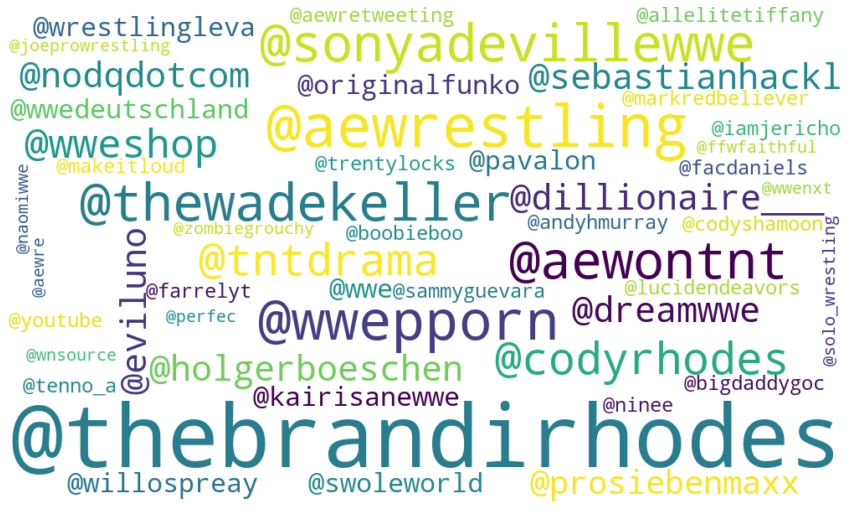

In [24]:
#Make a wordcloud representation
tuples = [tuple(x) for x in fd.values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
words = []
words_filtered = []
words = ' '.join(tweets_df["text"])
words = re.sub(r"http\S+", "", words)
words = words.replace('RT ', ' ').replace('&amp;', 'and')
words = re.sub('[^A-Za-z0-9]+', ' ', words)
words = words.lower()
tokenized_words = word_tokenize(words)
stopword_list=set(stopwords.words("english"))
#stopword_list.add("")
for word in tokenized_words:
    if word not in stopword_list:
        if "@"+word not in mentioned_accounts:#exclude accounts
            if "#"+word not in hashtag_words:#exclude hashtags
                words_filtered.append(word)


In [26]:
fdist = FreqDist(words_filtered)
fd = pd.DataFrame(fdist.most_common(50), columns = ["Word","Frequency"])#.drop([0]).reindex()
trace = go.Bar(x=fd["Word"], y=fd["Frequency"], name="Freq Dist")
# data = [trace]
# py.iplot(data)
fig = go.Figure(trace)
fig.update_layout(
    title="Most Frequently Words (excluding hashtags and usernames)",
    xaxis_title="Words",
    yaxis_title="Frequency",
)
fig.show()

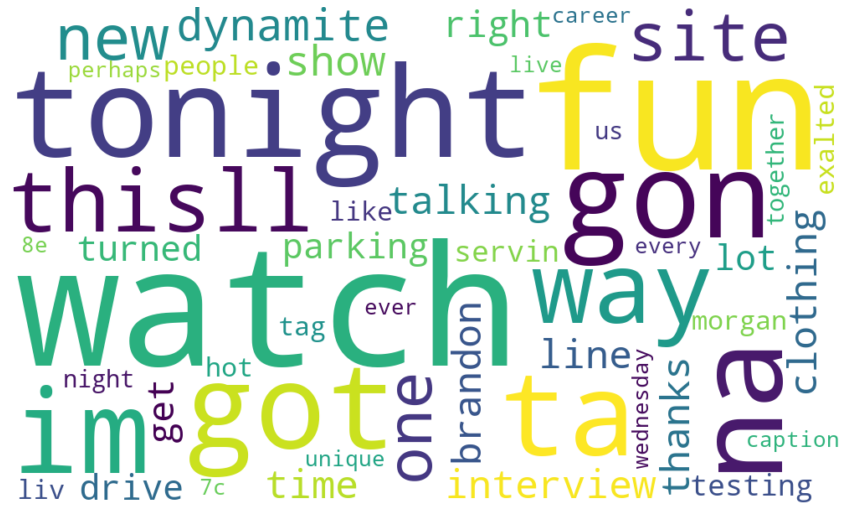

In [27]:
#Make a wordcloud representation
tuples = [tuple(x) for x in fd.values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
is_in_US=[]
geo = tweets_df[['user_location']]
tweets_df = tweets_df.fillna(" ")
for x in tweets_df['user_location']:
    check = False
    for s in STATES:
        if s in x:
            is_in_US.append(STATE_DICT[s] if s in STATE_DICT else s)
            check = True
            break
    if not check:
        is_in_US.append(None)
is_in_US
geo_dist = pd.DataFrame(is_in_US, columns=['State']).dropna().reset_index()
geo_dist = geo_dist.groupby('State').count().rename(columns={"index": "Number"}) \
        .sort_values(by=['Number'], ascending=False).reset_index()
geo_dist["Log Num"] = geo_dist["Number"].apply(lambda x: math.log(x, 2))
geo_dist['Full State Name'] = geo_dist['State'].apply(lambda x: INV_STATE_DICT[x])
geo_dist['text'] = geo_dist['Full State Name'] + '<br>' + 'Num: ' + geo_dist['Number'].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=geo_dist['State'], # Spatial coordinates
    z = geo_dist['Number'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Number of tweets",
))
fig.update_layout(
    title_text = 'Tweets by User Location',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

In [29]:
# Time series
total = tweets_df.groupby(pd.Grouper(key='created_at', freq='10min')).count().reset_index()
total = total.rename(columns={"user_name": "Num of tweets", "created_at":"Time in CST"})  
time_series = total["Time in CST"].reset_index(drop=True)
result = tweets_df.groupby([pd.Grouper(key='created_at', freq='10min'), 'sentiment']).count().unstack(fill_value=0).stack().reset_index()
result = result.rename(columns={"user_name": "Num of tweets", "created_at":"Time in CST"})  
time_series_ = result["Time in CST"][result['sentiment']==0].reset_index(drop=True)

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=time_series,
    y=total["Num of tweets"],
    name="Total",
    opacity=0.8))
fig.add_trace(go.Scatter(
    x=time_series,
    y=result["Num of tweets"][result['sentiment']==0].reset_index(drop=True),
    name="Neural",
    opacity=0.8))
fig.add_trace(go.Scatter(
    x=time_series,
    y=result["Num of tweets"][result['sentiment']<0].reset_index(drop=True),
    name="Negative",
    opacity=0.8))
fig.add_trace(go.Scatter(
    x=time_series,
    y=result["Num of tweets"][result['sentiment']>0].reset_index(drop=True),
    name="Positive",
    opacity=0.8))

fig.update_layout(
    title="Number of Tweets over time (and sentiment of Tweets)",
    xaxis_title="Time in CST",
    yaxis_title="Frequency",
)
fig.show()


In [31]:
print("There are {} different users".format(tweets_df['user_name'].nunique()))

There are 130 different users


In [32]:
user_tweets = tweets_df.groupby('user_name').count()
user_tweets = user_tweets.rename(columns={"text":"count"}).reset_index()
user_tweets.head()

user_name  created_at  id_str  count  in_reply_to  was_retweet_id  \
0         0231Jana           1       1      1            1               1   
1  ASHLEYHARDYBRND           1       1      1            1               1   
2  Alexand50011886           1       1      1            1               1   
3    AlissaDrayson           1       1      1            1               1   
4    AngelaDawn623           1       1      1            1               1   

   was_retweet_user  user_location  user_description  user_created  geo  \
0                 1              1                 1             1    1   
1                 1              1                 1             1    1   
2                 1              1                 1             1    1   
3                 1              1                 1             1    1   
4                 1              1                 1             1    1   

   coordinates  user_followers_count  user_friends_count  retweet_count  \
0            1                     1                   1              1   
1            1                     1                   1              1   
2            1                     1                   1              1   
3            1                     1                   1              1   
4            1                     1                   1              1   

   favorites_count  polarity  subjectivity  is_retweet  sentiment  
0                1         1             1           1          1  
1                1         1             1           1          1  
2                1         1             1           1          1  
3                1         1             1           1          1  
4                1         1             1           1          1

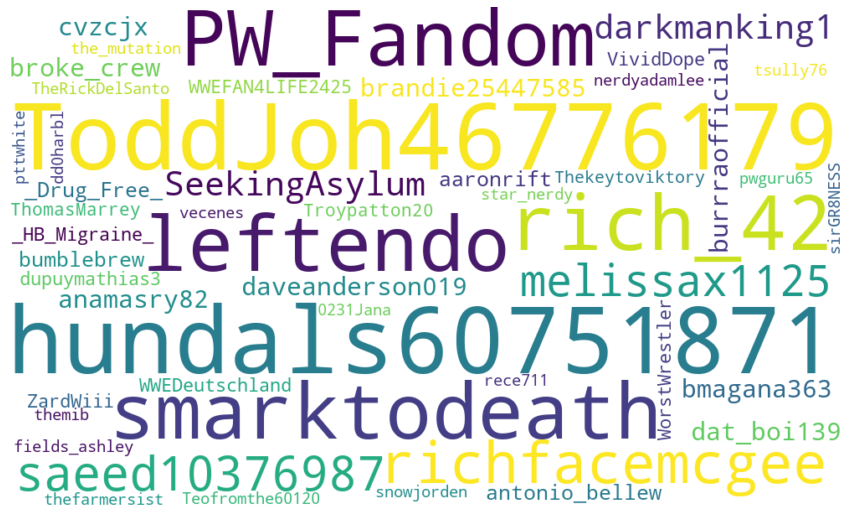

In [33]:
# Top 50 users with most tweets
fd = user_tweets[["user_name","count"]].sort_values(by=['count'], ascending=False).head(50)
# trace = go.Bar(x=fd["user_name"], y=fd["count"], name="Freq Dist")
# data = [trace]
# py.iplot(data)
#Make a wordcloud representation
tuples = [tuple(x) for x in fd.values]
wordcloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()